# Tensors
A tensor is essentially a matrix that can have multiple discrete dimensions. For example, a 2D tensor can represent a grayscale or black and white image. Similarly, a 3D tensor can represent a multi-channel color image. Lastly, a 4D tensor can represent a sequence of images.

Among many of the features that PyTorch tensors provide, some important ones are as follows:
- Efficient computation on both CPU and GPU (*NumPy doesn't support GPU*)
- Automatic differentiation (*NumPy doesn't have this capability*)
- Efficient data I/O

In [2]:
import numpy as np
import pandas as pd
import torch

# fastai is a higher level library for PyTorch
from fastai.vision.all import *

In [3]:
# Check PyTorch Version
torch.__version__

'1.12.0'

# Initializing Tensor

Tensors can run both in CPU and GPU. `torch.cuda.is_available()` is a convenient function to check if your environment supports GPU.

In [4]:
# setting device
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cpu


A `Tensor` can be created from a Python list, with a designated data type, and on a specified device. The `requires_grad` tells whether to compute gradients for any operation with this variable. We will explore this autograd functionality later in this tutorial.

In [87]:
x = torch.tensor([1, 2, 3, 4, 5], dtype=torch.float64, device=device, requires_grad=True)
x

tensor([1., 2., 3., 4., 5.], dtype=torch.float64, requires_grad=True)

Each instances of a `Tensor` object has the following usefult properties.
- `ndim` returns the number of *axes* or *dimensions* of the tensor. It is also called the *rank* of a tensor. For example, the above tensor has rank of 1 since it has only 1 axis. In contrast, a $5\times10$ tensor will have a rank of 2 since it has 2 axes (rows and columns).
- `shape` returns the length of each axis or rank. For example, a $15\times10\times5$ tensor has 3 dimensions or axes, and the shape of each axes are 15, 10, and 5 respectively.

In [88]:
print('Total number of elements: ', x.numel())
print('Data type of each element: ', x.dtype)
print('Rank/Dimension: ', x.ndim)
print('Length of each dimension: ', x.shape)
print(x.requires_grad)
print(x.device)

Total number of elements:  5
Data type of each element:  torch.float64
Rank/Dimension:  1
Length of each dimension:  torch.Size([5])
True
cpu


### `tensor()` Vs. `as_tensor()` Vs. `from_numpy()`

- `torch.tensor()` always copies data and discards and previous autograd history.
- If you do not want to copy data and share autograd history, you may use `torch.as_tensor()`.
- `torch.from_numpy()` creates a tensor that shares storage with a NumPy array.

In [204]:
y = np.arange(5, dtype=np.float32)
y

array([0., 1., 2., 3., 4.], dtype=float32)

In [205]:
z = torch.from_numpy(y)
z

tensor([0., 1., 2., 3., 4.])

Modification to `z` will be reflected on `y` since they share memory storage now.

In [206]:
z[0] = 100.75
print(z)
print(y)

tensor([100.7500,   1.0000,   2.0000,   3.0000,   4.0000])
[100.75   1.     2.     3.     4.  ]


The values of y is copied to z. They are using the same memory address. So, any change in z will be reflected in y.

In [207]:
z = torch.tensor(y)
z

tensor([100.7500,   1.0000,   2.0000,   3.0000,   4.0000])

In [208]:
z[0] = 500.75
print(z)
print(y)

tensor([500.7500,   1.0000,   2.0000,   3.0000,   4.0000])
[100.75   1.     2.     3.     4.  ]


The values of y is not copied to z. They are not using the ame memory address. So, any change in z will not be reflected in y.

In [209]:
z = torch.as_tensor(y)
z

tensor([100.7500,   1.0000,   2.0000,   3.0000,   4.0000])

As evident below, both `y` and `z` have different memory addresses.

In [210]:
z[0] = 125.90
print(z)
print(y)

tensor([125.9000,   1.0000,   2.0000,   3.0000,   4.0000])
[125.9   1.    2.    3.    4. ]


We can also convert a `tensor` back to a `ndarray` using the `numpy()` function.

In [211]:
z.numpy()

array([125.9,   1. ,   2. ,   3. ,   4. ], dtype=float32)

We can also create a `tensor` from a `Pandas` `Series` data structure. We can simply convert a `Series` into a `ndarray` using the `values` property. Then we can simply use the `as_tensor` or `from_numpy` function to create a new `tensor`.

In [28]:
series = pd.Series([1, 2, 3, 4, 5, 6],
                    index=['January', 'February', 'March', 'April', 'May', 'June'])
series

January     1
February    2
March       3
April       4
May         5
June        6
dtype: int64

In [29]:
torch.as_tensor(series.values)

tensor([1, 2, 3, 4, 5, 6])

### Shorthands for Tensor Initialization

There are several useful shorthands for quickly creating tensors of arbitrary shapes.

In [133]:
x = torch.empty((3, 3))
y = torch.zeros((2, 2))
z = torch.ones((3, 3))
p = torch.rand((2, 2))
q = torch.eye(5, 5)

In [134]:
print(x)

tensor([[1.2612e-44, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 2.7551e-40, 0.0000e+00]])


Further methods for creating `tensor`s. A useful function for plotting mathematical functions is <code>torch.linspace()</code>. <code>torch.linspace()</code> returns evenly spaced numbers over a specified interval. You specify the starting point of the sequence and the ending point of the sequence. The parameter <code>steps</code> indicates the number of samples to generate.

In [135]:
x = torch.arange(start=10, end=20, step=5)
y = torch.linspace(start=10, end=20, steps=5)

In [136]:
print(x)
print(y)

tensor([10, 15])
tensor([10.0000, 12.5000, 15.0000, 17.5000, 20.0000])


Finally, we can use `tolist` function to convert a `tensor` directly to a `Python` list.

In [137]:
y.tolist()

[10.0, 12.5, 15.0, 17.5, 20.0]

# Type Casting
Sometimes you might need to change the data type of a tensor that you have already created. There are two different ways to that in PyTorch.

In [138]:
x = torch.arange(4)
print(x)
print(x.dtype)

tensor([0, 1, 2, 3])
torch.int64


In [139]:
# convert to boolean
print(x.bool())
# convert to int16
print(x.short())
# convert to int64
print(x.long())
# convert to float16
print(x.half())
# convert to float32
print(x.float())
# convert to float64
print(x.double())

tensor([False,  True,  True,  True])
tensor([0, 1, 2, 3], dtype=torch.int16)
tensor([0, 1, 2, 3])
tensor([0., 1., 2., 3.], dtype=torch.float16)
tensor([0., 1., 2., 3.])
tensor([0., 1., 2., 3.], dtype=torch.float64)


It is also possible to typecast using the `to` function, and giving the intended `torch` type as a parameter.

In [140]:
# convert to boolean
print(x.to(torch.bool))
# convert to int16
print(x.to(torch.int16))
# convert to int64
print(x.to(torch.int64))
# convert to float16
print(x.to(torch.float16))
# convert to float32
print(x.to(torch.float32))
# convert to float64
print(x.to(torch.float64))

tensor([False,  True,  True,  True])
tensor([0, 1, 2, 3], dtype=torch.int16)
tensor([0, 1, 2, 3])
tensor([0., 1., 2., 3.], dtype=torch.float16)
tensor([0., 1., 2., 3.])
tensor([0., 1., 2., 3.], dtype=torch.float64)


# Math Operations

In [141]:
x = torch.tensor([1, 2, 3])
y = torch.tensor([4, 5, 6])

In [142]:
# addition
z = x + y
print(z)
# subtraction
z = x - y
print(z)
# element-wise division
z = x / y
print(z)

tensor([5, 7, 9])
tensor([-3, -3, -3])
tensor([0.2500, 0.4000, 0.5000])


In [143]:
# inplace operations, more efficient
x.add_(y)
print(x)
x.subtract_(y)
print(x)
x.pow_(2)
print(x)

tensor([5, 7, 9])
tensor([1, 2, 3])
tensor([1, 4, 9])


In [144]:
# matrix multiplication
x = torch.rand((4, 2))
y = torch.rand((2, 5))
x.mm(y)

tensor([[0.9703, 0.0894, 0.9128, 0.7919, 1.0077],
        [0.4227, 0.0311, 0.4136, 0.3095, 0.4387],
        [0.1663, 0.0476, 0.0907, 0.2822, 0.1738],
        [0.6060, 0.0606, 0.5604, 0.5162, 0.6295]])

In [146]:
# batch matrix multiplication
batch = 64
x = torch.rand((batch, 10, 20))
y = torch.rand((batch, 20, 30))
x.bmm(y).shape

torch.Size([64, 10, 30])

In [148]:
# element-wise multiplication
x = torch.arange(5)
y = torch.arange(5, 10)
x * y

tensor([ 0,  6, 14, 24, 36])

In [53]:
# dot product
x.dot(y)

tensor(80)

### Logical Operataions

In [150]:
x = torch.rand((5))
y = torch.rand((5))
print(x)
print(y)

tensor([0.5965, 0.7356, 0.3697, 0.8561, 0.5520])
tensor([0.5431, 0.0540, 0.6521, 0.3334, 0.4482])


In [151]:
print(x < y)
print(x > y)
print(x == y)
print(x != y)

tensor([False, False,  True, False, False])
tensor([ True,  True, False,  True,  True])
tensor([False, False, False, False, False])
tensor([True, True, True, True, True])


In [156]:
torch.sum((x != y))

tensor(5)

# Broadcasting
PyTorch, when it tries to perform a simple operation between two tensors of different ranks, will use broadcasting: it will automatically expand the tensor with the smaller rank to have the same size as the one with the larger rank. 

In [166]:
x = torch.ones((5, 5))
print(x)
print(x.shape)

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])
torch.Size([5, 5])


In [167]:
y = torch.tensor([1, 2, 3, 4, 5])
print(y)
print(y.shape)

tensor([1, 2, 3, 4, 5])
torch.Size([5])


In [168]:
# (5) vector is broadcasted to each row of (5, 5) matrix.
# PyTorch pretends that the (5) vector is actually (5, 5)
# and fills the other 4 rows using the first row. But it
# doesn't actually allocate them in memory.
x + y

tensor([[2., 3., 4., 5., 6.],
        [2., 3., 4., 5., 6.],
        [2., 3., 4., 5., 6.],
        [2., 3., 4., 5., 6.],
        [2., 3., 4., 5., 6.]])

# Useful Functions
**It is often better to avoid loops and use these functions to speed up performance.
Raw Python loops are too slow. To levelrage the underlying `C` codes of `PyTorch`,
avoid them.**

In [169]:
x = torch.tensor([
    [1, 2, 3, 4, 5],
    [6, 7, 8, 9, 10]
])
x

tensor([[ 1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10]])

In [170]:
# row-wise sum
print(x.sum(dim=0))
# column-wise sum
print(x.sum(dim=1))

tensor([ 7,  9, 11, 13, 15])
tensor([15, 40])


In [171]:
# returns the minimum element of each column
print(x.min(dim=0))
# returns the minimum element of each row
print(x.min(dim=1))

torch.return_types.min(
values=tensor([1, 2, 3, 4, 5]),
indices=tensor([0, 0, 0, 0, 0]))
torch.return_types.min(
values=tensor([1, 6]),
indices=tensor([0, 0]))


In [172]:
# returns the maximum element of each row
print(x.max(dim=1))
# returns the maximum element of each column
print(x.max(dim=0))

torch.return_types.max(
values=tensor([ 5, 10]),
indices=tensor([4, 4]))
torch.return_types.max(
values=tensor([ 6,  7,  8,  9, 10]),
indices=tensor([1, 1, 1, 1, 1]))


In [173]:
# returns the position of the maximum element row-wise
print(x.argmax(dim=1))
# returns the position of the maximum element column-wise
print(x.argmax(dim=0))

tensor([4, 4])
tensor([1, 1, 1, 1, 1])


In [174]:
# returns the position of the minimum element row-wise
print(x.argmin(dim=1))
# returns the position of the minimum element column-wise
print(x.argmin(dim=0))

tensor([0, 0])
tensor([0, 0, 0, 0, 0])


In [175]:
# returns means of each column
print(torch.mean(x.float(), dim=0))

tensor([3.5000, 4.5000, 5.5000, 6.5000, 7.5000])


In [176]:
# sorts tensor
x = torch.rand(10)
print(x)
x, indices = x.sort(descending=False)
print(x)
print(indices)

tensor([0.6842, 0.8863, 0.8230, 0.9111, 0.4031, 0.2792, 0.8030, 0.4076, 0.8587,
        0.7952])
tensor([0.2792, 0.4031, 0.4076, 0.6842, 0.7952, 0.8030, 0.8230, 0.8587, 0.8863,
        0.9111])
tensor([5, 4, 7, 0, 9, 6, 2, 8, 1, 3])


In [177]:
# clamp tensor between values
x = torch.tensor([0, 1, 4, 5, 6, 7, 10, 11])
print(x)
# any element less than 2 is set to 2, and any element more than 10 is set to 10
x = x.clamp(min=2, max=10)
print(x)

tensor([ 0,  1,  4,  5,  6,  7, 10, 11])
tensor([ 2,  2,  4,  5,  6,  7, 10, 10])


In [178]:
x = torch.tensor([0, 0, 1, 1, 1], dtype=torch.bool)
# checks if any of the values is true
print(x.any())
# checks if all the values are true
print(x.all())

tensor(True)
tensor(False)


# Indexing
The contents of a tensor can be accessed and modified using Python’s indexing and slicing notation.

In [179]:
batch_size = 64
feature_size = (3, 256, 256)

img = torch.rand((batch_size, *feature_size))

In [180]:
# selecting first image
print(img[0].shape)
# selecting first color channel of first image
print(img[0, 0].shape)
# selecting first row of first color channel of first image
print(img[0, 0, 0].shape)
# slecting first column of first color channel of first image
print(img[0, 0, :, 0].shape)

torch.Size([3, 256, 256])
torch.Size([256, 256])
torch.Size([256])
torch.Size([256])


The number on the left side of the colon represents the index of the first value. The number on the right side of the colon is always 1 larger than the index of the last value. For example, <code>tensor_sample\[1:4]</code> means you get values from the index 1 to index 3 <i>(4-1)</i>.

In [181]:
# selecting 3rd column of 2nd color channel of all images
print(img[:, 1, :, 2].shape)
# selecting 3rd column of 2nd color channel of first 10 images
print(img[:10, 1, :, 2].shape)

torch.Size([64, 256])
torch.Size([10, 256])


### Fancy Indexing

We can leverage fancy indexing and use boolean conditions to select specific values too.

In [183]:
x = torch.tensor([1, 2, 3, 4, 5])
print(x < 4)
print(x[x < 4])
print((x < 2) | (x > 4))
print(x[(x < 2) | (x > 4)])
print((x < 3) & (x < 2))
print(x[(x < 3) & (x < 2)])

tensor([ True,  True,  True, False, False])
tensor([1, 2, 3])
tensor([ True, False, False, False,  True])
tensor([1, 5])
tensor([ True, False, False, False, False])
tensor([1])


The `where` function returns elements as it is if condition is met, otherwise changes value according to given formulae.

In [184]:
x.where(x < 2, x + 100)

tensor([  1, 102, 103, 104, 105])

The `unique` function returns the unique elements in the list.

In [185]:
x.unique()

tensor([1, 2, 3, 4, 5])

Use `torch.Tensor.item()` to get a Python number from a tensor containing a single value.

In [186]:
# Returns a single item
x[0].item()

1

If we can select a specific value or a range of values from a `tensor`, we can also assign new values to those positions. For example, below we have selected the first 2 items of `x` and assigned new values to them.

In [187]:
print(x)

tensor([1, 2, 3, 4, 5])


In [188]:
x[0:2] = torch.tensor([100, 101])
x

tensor([100, 101,   3,   4,   5])

# Reshaping & Resizing
For some operations, the input tensors need to have a certain number of dimensions (also called rank) and a certain number of elements (shape). So, we might have to change the shape of a tensor, add a new dimension, or make a dimension smaller that isn't needed.

In [189]:
x = torch.arange(12)
x

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [190]:
print(x.shape)
print(x.ndim)

torch.Size([12])
1


The `view` function can be used to reshape a vector. For example, before `x` was a 1 dimensional vector. Later we reshaped it into a 2 dimensional matrix with 3 rows and 4 columns. The number of elements in a tensor must remain constant after applying view.

In [191]:
x_reshaped = x.view(3, 4)
x_reshaped

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [192]:
print(x_reshaped.shape)
print(x_reshaped.ndim)

torch.Size([3, 4])
2


 However, `view` requires contiguous memory, in contrast to `reshape`. Therefore, `reshape` is safe to use in expanse of performance.

In [193]:
print(x.reshape(3, 4))

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])


If you have a tensor with dynamic size, you can use `-1` to represent any size. But you can set only one dimension as `-1`. It means that `PyTorch` will calculate the suitable number for that dimension by itself.

In [194]:
x.view(-1, 4)

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

We can concatenate two tensors both row-wise and column-wise.

In [195]:
# concatenates two tensors
x = torch.rand((3, 3))
y = torch.rand((3, 3))

In [196]:
# concatenates x and y column-wise
print(torch.cat((x, y), dim=0))

tensor([[0.5907, 0.3194, 0.9517],
        [0.9803, 0.0220, 0.8626],
        [0.2246, 0.1845, 0.1180],
        [0.0938, 0.7445, 0.2209],
        [0.9670, 0.0245, 0.6205],
        [0.5002, 0.7280, 0.6862]])


In [197]:
# concatenates x and y row-wise
print(torch.cat((x, y), dim=1))

tensor([[0.5907, 0.3194, 0.9517, 0.0938, 0.7445, 0.2209],
        [0.9803, 0.0220, 0.8626, 0.9670, 0.0245, 0.6205],
        [0.2246, 0.1845, 0.1180, 0.5002, 0.7280, 0.6862]])


We can divide a `tensor` into multiple chunks using the `chunk` function.

In [198]:
x_chunks = torch.chunk(x, 3)
for chunk in x_chunks:
    print(chunk)

tensor([[0.5907, 0.3194, 0.9517]])
tensor([[0.9803, 0.0220, 0.8626]])
tensor([[0.2246, 0.1845, 0.1180]])


Sometimes we might need splits of different sizes. We can use the `split` function instead and define the size of each splits manually.

In [199]:
x_chunks = torch.split(x, split_size_or_sections=[2, 1])
for chunk in x_chunks:
    print(chunk)

tensor([[0.5907, 0.3194, 0.9517],
        [0.9803, 0.0220, 0.8626]])
tensor([[0.2246, 0.1845, 0.1180]])


In [200]:
# unrolling all elements
x.reshape(-1)

tensor([0.5907, 0.3194, 0.9517, 0.9803, 0.0220, 0.8626, 0.2246, 0.1845, 0.1180])

In [201]:
print(img.shape)
# converting 2d color images into a vector of pixels
print(img.reshape(64, -1).shape)

torch.Size([64, 3, 256, 256])
torch.Size([64, 196608])


In [202]:
# swapping dimensions, changing colour channel dimension to the last
print(img.permute(0, 2, 3, 1).shape)

torch.Size([64, 256, 256, 3])


The `squeeze` function removes the given dimension, whereas the `unsqueeze` function adds an extra dimension.

In [203]:
# add and remove a single dimension to the existing one
x = torch.arange(10)
print(x)
x = x.unsqueeze(0)
print(x.shape)
print(x.unsqueeze(2).shape)
print(x.squeeze(0).shape)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
torch.Size([1, 10])
torch.Size([1, 10, 1])
torch.Size([10])


# Digit Classification
In this short exercise, we will be building a naive **baseline** classifier to classify digits $3$ and $7$. We will utilize the `fast.ai` repository's MNIST SAMPLE dataset that only contains digits $3$ and $7$.

In [4]:
# Loads MNIST dataset from Fast.ai repository
# This trimmed dataset contains only 3s and 7s
path = untar_data(URLs.MNIST_SAMPLE)
path

Path('/Users/musabbirhasansammak/.fastai/data/mnist_sample')

fast.ai API returns the path to the downloaded dataset. The path is not just a string, rather it is a python Path object Learn more from [**documentation**](https://docs.python.org/3/library/pathlib.html). Or watch this [**tutorial**](https://www.youtube.com/watch?v=YwhOUyTxXVE) for a quick introduction. The new path object comes with many unix commands baked into itself for convenience.

In [6]:
print(path.ls())

[Path('/Users/musabbirhasansammak/.fastai/data/mnist_sample/valid'), Path('/Users/musabbirhasansammak/.fastai/data/mnist_sample/labels.csv'), Path('/Users/musabbirhasansammak/.fastai/data/mnist_sample/train')]


The `/` operator is one of the most convenient shorthands for creating new paths.

In [7]:
print((path / 'train').ls())

[Path('/Users/musabbirhasansammak/.fastai/data/mnist_sample/train/7'), Path('/Users/musabbirhasansammak/.fastai/data/mnist_sample/train/3')]


In [10]:
threes = (path/'train/3').ls().sorted()
sevens = (path/'train/7').ls().sorted()

print(threes[:3])
print()
print(sevens[:3])

[Path('/Users/musabbirhasansammak/.fastai/data/mnist_sample/train/3/10.png'), Path('/Users/musabbirhasansammak/.fastai/data/mnist_sample/train/3/10000.png'), Path('/Users/musabbirhasansammak/.fastai/data/mnist_sample/train/3/10011.png')]

[Path('/Users/musabbirhasansammak/.fastai/data/mnist_sample/train/7/10002.png'), Path('/Users/musabbirhasansammak/.fastai/data/mnist_sample/train/7/1001.png'), Path('/Users/musabbirhasansammak/.fastai/data/mnist_sample/train/7/10014.png')]


In [13]:
print(len(threes))
print(len(sevens))

6131
6265


In [14]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]

len(three_tensors), len(seven_tensors)

(6131, 6265)

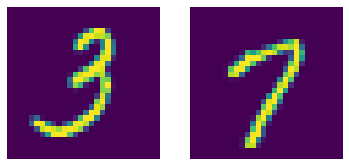

In [29]:
show_images((three_tensors[15], seven_tensors[10]))

In [30]:
stacked_sevens = torch.stack(seven_tensors).float() / 255
stacked_threes = torch.stack(three_tensors).float() / 255

print(stacked_threes.shape)
print(stacked_sevens.shape)

torch.Size([6131, 28, 28])
torch.Size([6265, 28, 28])


Our idea is to find the mean representation of $3$ and $7$. Then for any new digit,
we will compute the distance from the digit to both $3$ and $7$. We will predict the
digit with the smallest distance between the two. Next, we will calculate the average
representation of the digits $3$ and $7$.

<AxesSubplot:>

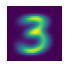

In [31]:
mean3 = stacked_threes.mean(0)
show_image(mean3)

<AxesSubplot:>

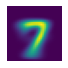

In [32]:
mean7 = stacked_sevens.mean(0)
show_image(mean7)

Next we will create some functions to calculate distance between two images, and
also to predict digit.

In [33]:
def l1_distance(img1: tensor, img2: tensor) -> tensor:
    """Function to calculate average l1 distance or the mean absolute error between
    two images."""
    return (img1 - img2).abs().mean((-1, -2))

In [81]:
def predict(img: tensor) -> int:
    """Returns 3 if the distance between given image and average image of the
    digit 3 is smaller than that of digit 7. Returns 7 otherwise."""
    mask = l1_distance(img, mean3) < l1_distance(img, mean7)
    mask = torch.where(mask, torch.tensor(3), torch.tensor(7))
    return mask

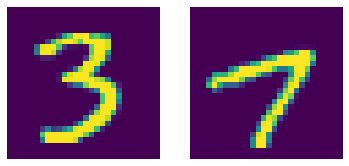

In [82]:
a_3 = stacked_threes[1]
a_7 = stacked_sevens[12]

show_images((a_3, a_7))

In [83]:
print(predict(a_3))
print(predict(a_7))

tensor(3)
tensor(7)


Our model worked well on the training data. Let's load the validation data and 
measure the performance.

In [84]:
valid_3_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float() / 255

valid_7_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'7').ls()]) 
valid_7_tens = valid_7_tens.float() / 255

valid_3_tens.shape, valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

Next, we will combine the $3$ and $7$ tensors to a single dataset.

In [86]:
valid_data_x = torch.cat([valid_3_tens, valid_7_tens])
valid_data_x.shape

torch.Size([2038, 28, 28])

We will create a tensor to store the actual labels.

In [87]:
valid_data_y = torch.tensor([3] * valid_3_tens.shape[0] + [7] * valid_7_tens.shape[0])
valid_data_y.shape

torch.Size([2038])

Finally, we will predict and compute the accuracy.

In [88]:
predictions = predict(valid_data_x)

In [93]:
# Accuracy
acc = torch.sum(predictions == valid_data_y) / len(predictions) * 100
acc.item()

95.14229583740234

# Autograd
A tensor can be created with `requires_grad=True` so that `torch.autograd` records operations on them for automatic differentiation. For example, we know that
$$y = x^2$$
$$\frac{\mathrm{dy(x)}}{\mathrm{dx}}=2x$$
$$\frac{\mathrm{dy(x=2)}}{\mathrm{dx}}=2(2)=4$$


In [214]:
x = torch.tensor([2], dtype=torch.float32, requires_grad=True)
x

tensor([2.], requires_grad=True)

In [215]:
y = x ** 2
y

tensor([4.], grad_fn=<PowBackward0>)

In [216]:
y.backward()
print("The dervative at x = 2: ", x.grad)

The dervative at x = 2:  tensor([4.])


Now, we will do the same when inputs have multiple data points.

In [217]:
x = torch.tensor([2, 3, 4, -2, -3, -4], dtype=torch.float32, requires_grad=True)
x

tensor([ 2.,  3.,  4., -2., -3., -4.], requires_grad=True)

In [218]:
y = (x ** 2).sum()
y

tensor(58., grad_fn=<SumBackward0>)

In [219]:
y.backward()
print("The dervative at x = 2: ", x.grad)

The dervative at x = 2:  tensor([ 4.,  6.,  8., -4., -6., -8.])
